# La (semi-)complétion automatique

**Auteurs:**
* Cuenin Tommy
* Grosdidier Alphée

<div>
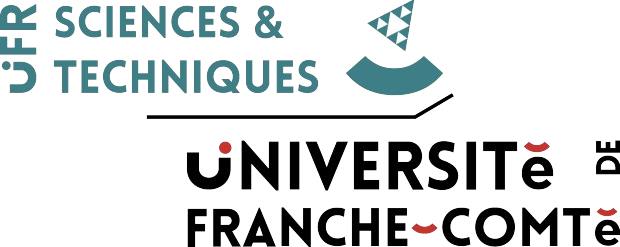
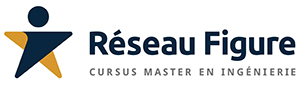
</div>

### Table des matières:
* [Les approches utilisées](#appproches)
    * [Introduction](#introduction)
    * [Histoire](#histoire)
    * [Par dictionnaire](#dictionnaire)
    * [Par mot précedemment saisis](#predemment-saisis)
    * [Par les caractères de l'application](#caractere-application)
    * [Par sémantique](#semantique)
* [Les algorithmes de calcul de distance](#calcul-distance)
    * [Initialisation des scripts](#script-init)
    * [Distance de Levenshtein](#calcul-distance-levenshtein)
    * [Distance Damerau-Levenshtein](#calcul-distance-damerau-levenshtein)
    * [Distance de Jaro](#calcul-distance-jaro)
    * [Distance de Jaro-Winkler](#calcul-distance-jaro-winkler)
    * [Un point de comparaison](#calcul-comparaison)
    * [Nos modifications](#calcul-mofifications)
* [Chaînes de Markov](#chaine-markov)
* [Pour conclure](#conclusion)

## Les approches utilisées <a class="anchor" id="appproches"></a>

### Introduction <a class="anchor" id="introduction"></a>

La semi-complétion automatique est une fontionnalité informatique permettant à l'utilisateur de limiter la quantité d'information qu'il saisie avec son clavier , en se voyant proposer un complément qui pourrait convenir avec la chaîne de caractères qu'il a commencé à saisir.

La semi-complétion automatique a pour but de simplifier la tâche d'écriture de l'utilisateur.
On peux citer des exemples dans lesquels ces algorithmes sont utilisées :

* La complétion dans la recherche sur les navigateurs
* La complétions des mots dans les messages textes
* Dans l'écriture de code informatique
* Dans les mails

Dans cette présentation on se concentrera sur la semi-completion automatique des messages textes écrits par nos téléphones.

### Un peu d'histoire <a class="anchor" id="histoire"></a>

L’histoire des correcteurs automatiques a commencé chez Microsoft au début des années 90.
Le logiciel ne disposait que d'un "autoexpander", des racourcis clavier pour écrire un mot pré-enregistré.

**Dean Hachamovitch** S'est inspiré de ce système pour créer le premier correcteur orthographique qui remplaçait les "teh" par "the"

Lui et son équipe ont vu que c'était une idée interéssante et ont décidé de déveloper cette idée en créant des dictionnaires qui remplaçaient un mot mal orthographié par le mot correctement ortographié.

C'est ainsi qu'est apparue la première approche que nous allons détailler: l'approche par dictionnaire.

### Par dictionnaire <a class="anchor" id="dictionnaire"></a>

La (semi-)complétion automatique par dictionnaire est la première approche à avoir été utilisée sur téléphone.
Elle est la plus simple, est la plus rapide avec peu de puissance si on a les bons dictionnaires.

Elle a été utilisée sur les télephones **T9** qui sont des téléphones avec peu de puissance de calcul.
Petit rappel historique, ces téléphones ne disposaient que de 9 touches pour un alphabet de 26 lettres.

Plusieurs lettres étaient sur la même touche ce qui ralentissait l'écriture.
Pour acceder à la touche 'c' par exemple il fallait appuyer 3 fois sur la touche 1.

C'est de là qu'est né le language sms.
Il a donc fallut ajouter un autocompleteur pour écrire des mots complets sans pour autant avoir a appuyer sur 50 touches.

Pour cette approche on se base sur un dictionnaire qui contient les mots les plus utilisés de la langue (trop de mots peu utilisés alourdissent la mémoire et utilisent de la puissance de calcul inutilement), et d'un bon algorithme de distance.

Dans ce notebook, on montrera surtout des programmes basés sur cette approche.
Les algorithmes sont plus compréhensibles et simples.

### Par mot précedemment saisis <a class="anchor" id="predemment-saisis"></a>

Les suggestions données à l'utilisateur peuvent se baser sur son propre vocabulaire.
En effet on peut supposer que l'utilisateur sera amené à réutiliser des mots qu'il a déjà utilisé, la question sera donc de déterminer quels sont les mots qu'il réutilisera à l'avenir.

En moyenne une personne française utilise entre 300 et 5000 mots sur 32000 mots courrament utilisés.

On peut donc se servir de ces statistiques pour avoir des dictionnaires plus petit (et donc avoir une recherche plus rapide) pour faire les corrections avec l'approche précédente.

Cependant, connaissant les mot que la personnes utilise, on peut rechercher et afficher en priorité ces mots

Mais cela pose un problème qui est la gestion des données et de la vie privée qui est aux coeur des débats en 2022.
Il faut donc prendre cette approche avec des pincettes.

### Par les caratères de l'application <a class="anchor" id="caractere-application"></a>

Certains termes ne sont utilisés que dans certains cas comme par exemple une adresse mail.
Certains ne se trouvent pas dans le dictionnaire et donc un logiciel de complétion (semi-)automatique aura des difficultés à les corriger.

On peux donc choisir d'ajouter des paramètres de l'application comme mots faisant partie du dictionnaire

On peut prendre l'exemple des adresses mail dans un logiciel de messagerie.
Ou encore, les noms des contacts dans une application de messages pour téléphone.

Cela permet de gagner en efficacité et de ne pas corriger des mots qui ne doivent pas l'être.
Comme cité précédemment, lorsqu'on veut citer une personne on veut que le correcteur donne le bon nom et ne le corrige pas selon un mot dans le dictionnaire.

### Par sémantique <a class="anchor" id="semantique"></a>

Avec l'amélioration de la puissance et de la mémoire du matériel, les possibilités pour rendre la complétion automatique plus efficaces s'est aggrandie.
Les approches ci-dessus permettent une complétion semi-automatique correcte mais on peut aller plus loin.

Dans cette partie, on verra quelles approches ont découlé de cette augmentation de puissance.

#### Intelligence Artificielle <a class="anchor" id="intelligence-artificielle"></a>

Une nouvelle approche qui a fait surface depuis quelques années est celle de l'intelligence artificielle.
Le principe est d'entrainer une structure mathématique à produire un résultat par rapport à des entrées spécifiques.

La complexité avec une langue est que la combinaison des mots est infinie, c'est donc un problème très compliqué a résoudre.
De plus il faut une trés grande base de données et l'algorithme n'est pas adaptatif.

Une fois l'algorithme entrainé, il devient difficile de lui faire changer ses réponses.
De plus, des problèmes sur les types d'entrées et de sorties se posent:
* Faut-il prendre des mots en entrée et sortie, alors le programme ne pourra pas utiliser de nouveaux mots ou il faut le réentrainer constamment.
* Faut-il prendre des lettres, mais alors les résultas seront moins précis et les mots produits n'existent peut être pas.

Des questions qui sont compliquées a répondre.

#### Algorithme type GPT-3 <a class="anchor" id="intelligence-artificielle-GPT3"></a>

L'algorithme GPT est développé par *Open IA*.
Aujourd'hui l'un des meilleurs completeurs automatiques de phrases (voir plus).

Leur algorithme utilise l'intéligence artificielle comme cité ci-dessus, mais il ont une différence importante.
Cet algorithme va tenter de classifier les mots avant de les envoyer dans le réseau de neurones.

On va ainsi pouvoir classer les différents types de mots comme:
* Les mots qui ne portent pas de sens comme les: de, la, les, ou, etc.
* Les mots qui correspondent à des organisations, les noms de personnes.
* Les verbes, les adjectifs, etc.
Tous cela va permettre ensuite au réseau neuronal de comprendre les sens et de comprendre la phrase.

Le fait de comprendre la phrase va donc permettre de produire le mot suivant, la fin de la phrase ou plus.
L'algorithme GPT peut rédiger un paragraphe complet en partant de quelques lignes de contexte ou peut produire un texte selon les recommandations que vous lui faites.

Cette algorithme est devenu si puissant qu'il est intégré à d'autres logiciels de complétion automatique voir de jeux.
On peut citer parmi les logiciels qui l'utilise:
* IA Dongeon
* Github copilot
* Des chatbots

## Les algorithmes de calculs de distance <a class="anchor" id="calcul-distance"></a>

### Initialisation des scripts <a class="anchor" id="script-init"></a>

Dans le code de la cellule suivante on fait les importations classiques:
* Ipython pour l'affichage dans le notebook
* ipywidget pour rendre les scripts interactif et avoir de l'affichage dynamique
* pandas pour la gestion de bases de données conséquentes
* data.background pour les affichages des tableaux, faciliter l'affichage et executer un algorithme sur tous les mots de la base de données

On a créé un *setWidgetTextSize* pour régler la taille d'affichage des widgets

In [1]:
#%load_ext lab_black
%matplotlib inline
!test -d data || (apt install subversion && svn checkout https://github.com/thebosslol66/Recherche-Documentaire-Completion-automatique/trunk/data)
!test -d img || svn checkout https://github.com/thebosslol66/Recherche-Documentaire-Completion-automatique/trunk/img

from IPython.display import display, HTML
from ipywidgets import widgets, interact, interactive, fixed, interact_manual
import pandas as pd
import random
import data.background as utils

utils.setWidgetTextSize(2)

Dans la cellule ci-dessous, on charge simplement le dictionnaire de mots français, qui retire les mots qui ont 3 ou moins de caractères et charge le dictionnaire dan la fonction *utils.getPredictions*

In [2]:
filename = "data/liste.de.mots.francais.frgut.csv"
#http://www.pallier.org/liste-de-mots-francais.html

word_dict = utils.import_data(filename)
word_dict = utils.delete_useless_word_in_pd(word_dict)

utils.getPredictions = utils.getPredictionsFromDict(word_dict)

print("Nombre de mots dans le dictionnaire: ", len(word_dict))

TestWord = "abouhcemsnr"

IntProgress(value=0, description='Loading:', max=4, style=ProgressStyle(bar_color='blue'))

Nombre de mots dans le dictionnaire:  336437


### Distance de Levenshtein <a class="anchor" id="calcul-distance-levenshtein"></a>

Cet algorithme permet de calculer la distance entre deux mots.
Il n'a que 3 opérations de base sur les lettres des mots qui sont:
* l'ajout
* la suppression
* la substitution

La distance de Levensthein sera le nombre d'opération minimal pour passer d'un mot à l'autre, en conséquence, plus ce nombre sera petit, plus la distance sera petite donc plus les mots seront ressemblants.

Par exemple, la distance de Levenshtein en "foyers" et "loyer" est de 2, les opérations sont :
* une substitution de 'f' par 'l'
* une suppression de 's'

Pour calculer la distance de Levenshtein, on peut se servir de l'algorithme de Levenshtein appliqué à un tableau :
<div>
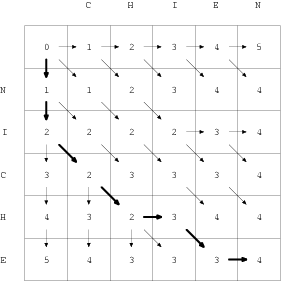
</div>
Dans ce tableau de taille (len(c1)+1,len(c2)+1) la première ligne et la première colonne sont remplies avec des valeurs allant de 0 aux tailles des chaînes associées.
Ensuite rempli le reste du tableau de la manière suivante :
Pour chaque case du tableau :
* on prend le minimum des cases du dessus, du côté gauche et de la diagonale haute gauche
* si les caractères associés ne sont pas égaux on ajoute 1 à cela
La distance de Levenstein est le dernier élément du tableau.

In [3]:
def DistanceDeLevenshtein(c1, show_table=False):
    #initialisation
    width = len(c1) + 1

    def funct(c2):
        #initialisation
        D = []
        height = len(c2) + 1
        for i in range(0, height):
            D.append([0] * width)
            D[i][0] = i
        for j in range(1, width):
            D[0][j] = j
            
        #parcours du tableau
        for i in range(1, height):
            for j in range(1, width):
                coutSubtitution = 1
                if c1[j - 1] == c2[i - 1]:
                    coutSubtitution = 0
                D[i][j] = min(
                    D[i - 1][j] + 1, D[i][j - 1] + 1, D[i - 1][j - 1] + coutSubtitution
                )
        #affichage
        if show_table:
            utils.showLevensteinTable("Tableau de Levenshtein", c1, c2, D)
        #retour
        return D[-1][-1]

    return funct

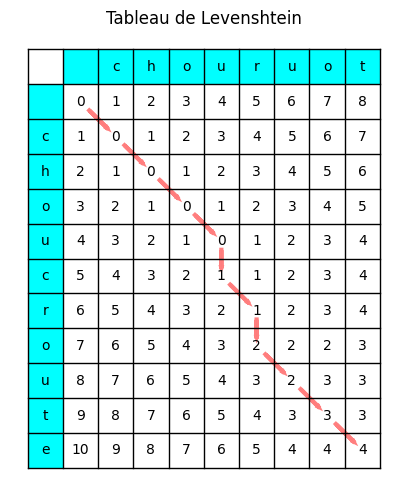

4

In [4]:
DistanceDeLevenshtein("chouruot", show_table=True)("choucroute")

Pour montrer les prédictions que peut faire cet algorithme, on compare l'ensemble du dictionnaire avec le mot mal (très mal) orthographié.

*On notifie que cette fonction est appelée avec le même mot pour tous les algorithmes pour avoir un aperçu de ce qu'est capable chaque algorithme.*

On obtient donc les suggestions proposées par ordre d'importance:

In [5]:
pred, time_elapsed = utils.getPredictions(DistanceDeLevenshtein, TestWord, TestWord[:2])
print(
    "{0} as mis {1:f} secondes pour s'executer".format(
        (DistanceDeLevenshtein.__name__), time_elapsed
    )
)

print("Prediction for word: ", TestWord)
print(pred)

DistanceDeLevenshtein as mis 0.646389 secondes pour s'executer
Prediction for word:  abouhcemsnr
           ortho  affinity
851  abouchement         4
936   aboutement         4
562    aboiement         5


### Distance Damerau-Levenshtein <a class="anchor" id="calcul-distance-damerau-levenshtein"></a>

Cet algorithme reprend les mêmes opérations que celui de Levenshtein mais ajoute aux opérations élémentaires la transposition de deux lettres côte à côte.
Toutes ces opérations correspondent a 80% des fautes d'orthographes humaines.

Dans l'algorithme la seul différence est que s'il remarque, que deux lettres sont inversées l'une par-rapport à l'autre dans les deux mots, ce qui aurait été considéré comme une double substitution dans l'algorithme de base devient une transposition.

Par exemple : la distance entre "ia" et "ai" passe de 2 (double substitution) à 1 (transposition).

In [6]:
def DistanceDeDamerauLevenshtein(c1, show_table=False):
    #initialisation
    width = len(c1) + 1

    def funct(c2):
        #initialisation
        D = []
        height = len(c2) + 1
        for i in range(0, height):
            D.append([0] * width)
            D[i][0] = i
        for j in range(1, width):
            D[0][j] = j

        #parcours du tableau
        for i in range(1, height):
            for j in range(1, width):
                coutSubtitution = 1
                if c1[j - 1] == c2[i - 1]:
                    coutSubtitution = 0
                D[i][j] = min(
                    D[i - 1][j] + 1, D[i][j - 1] + 1, D[i - 1][j - 1] + coutSubtitution
                )
                if (
                    i > 1
                    and j > 1
                    and c1[j - 1] == c2[i - 2]
                    and c1[j - 2] == c2[i - 1]
                ):
                    D[i][j] = min(D[i][j], D[i - 2][j - 2] + coutSubtitution)
                    
        #affichage
        if show_table:
            utils.showLevensteinTable("Tableau de Damerau-Levenshtein", c1, c2, D)
            
        #retour
        return D[-1][-1]

    return funct

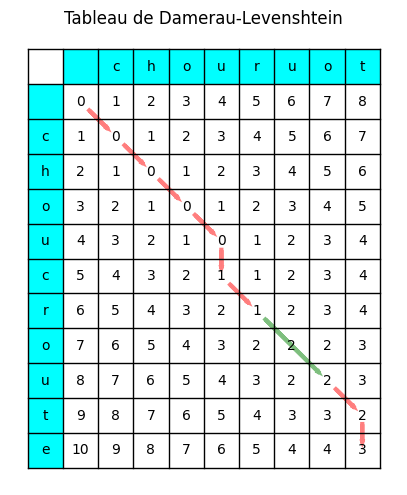

3

In [7]:
DistanceDeDamerauLevenshtein("chouruot", show_table=True)("choucroute")

On fait une recherche des meilleures correspondances de mots comme dans l'algorithme précédent.

In [8]:
pred, time_elapsed = utils.getPredictions(
    DistanceDeDamerauLevenshtein, TestWord, TestWord[:2]
)

print(
    "{0} as mis {1:f} secondes pour s'executer".format(
        (DistanceDeDamerauLevenshtein.__name__), time_elapsed
    )
)

print("Prediction for word: ", TestWord)
print(pred)

DistanceDeDamerauLevenshtein as mis 0.643067 secondes pour s'executer
Prediction for word:  abouhcemsnr
            ortho  affinity
851   abouchement         3
852  abouchements         4
853     abouchent         4


### Distance de Jaro <a class="anchor" id="calcul-distance-jaro"></a>

La distance de Jaro calcule le nombre de lettres qui sont présentes dans les deux mots et le nombre de lettres
qui ne sont pas à la bonne place par rapport aux autres.

On calcule la distance de Jaro à l'aide du calcul suivant : 
    $$d_j = \frac{1}{3}\left(\frac{m}{\text{len}(c1)}+\frac{m}{\text{len}(c2)}+\frac{m-t}{m}\right)$$
Avec :
* len(ci) est la longueur de la chaîne i
* m est le nombre de caractères correspondants
* t est le nombre de transpositions

On considère que deux caractères correspondent si le caractère est présent dans les deux chaînes et que la
distance les séparant est inférieure ou égale à :
    $$\lfloor\frac{\text{max}(\text{len}(c1), \text{len}(c2)}{2}\rfloor -1$$
    
Une première chose que l'on remarque est que la distance est comprise en 0 et 1 inclus, on peut considérer le réel obtenu étant un indice de ressemblance, plus sa valeur est élevée, plus les chaînes correspondent.

Concernant l'algorithme, il se fait en 3 étapes :
* On initialise un tableau de taille (len(c1),len(c2))
* On regarde dans un premier temps les lettres en commun puis les transpositions
* On applique la formule

In [9]:
def DistanceDeJaro(c1, show_table=False):
    len_c1 = len(c1)
    def DistanceDeJaro(c2):
        len_c2 = len(c2)
        if c1 == c2:
            return 1
        
        limit = int(max(len_c1, len_c2) / 2) - 1
        
        match = 0 
        c1_match = [0] * len_c1
        c2_match = [0] * len_c2
        
        for i in range(len_c1):
            for j in range(max(0, i - limit), min(len_c2, i + limit + 1)):
                if c1[i] == c2[j] and not c2_match[j]:
                    c1_match[i], c2_match[j] = 1, 1
                    match += 1
                    break
                    
        if show_table:
            utils.showJaroTable("Table de Jaro", c1, c2)
        if match == 0:
            return 0
        t = 0
        point = 0
        for i in range(len_c1):
            if c1_match[i]:
                while not c2_match[point]:
                    point += 1
                if c1[i] != c2[point]:
                    t += 1
                point += 1
        t /= 2
        
        return ((match / float(len_c1))+ (match / float(len_c2))+ ((match - t) / float(match))) / 3.0
    return DistanceDeJaro

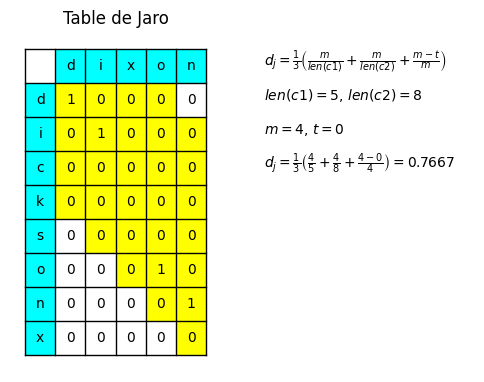

0.7666666666666666

In [10]:
DistanceDeJaro("dixon", show_table=True)("dicksonx")

On fait une recherche des meilleures correspondances de mots comme dans l'algorithme précédent.

In [11]:
pred, time_elapsed = utils.getPredictions(
    DistanceDeJaro, TestWord, TestWord[:2], modifier_funct=lambda x: 1 - x
)

print(
    "{0} a mis {1:f} secondes pour s'executer".format(
        (DistanceDeJaro.__name__), time_elapsed
    )
)

print("Prediction for word: ", TestWord)
print(pred)

DistanceDeJaro a mis 0.500386 secondes pour s'executer
Prediction for word:  abouhcemsnr
           ortho  affinity
865  aboucherons  0.127273
854     aboucher  0.132576
867     abouches  0.132576


### Distance de Jaro-Winkler <a class="anchor" id="calcul-distance-jaro-winkler"></a>

C'est une version améliorée de l'algorithme de Jaro qui donne plus d'importance sur la similitude des débuts de mots.
On part du principe que les mots écrits humainement sont généralement bien écrits dans les premières lettres puis les fautes d’orthographe apparaissent, en conséquence on va donner un avantage les mots qui ont le plus long préfixe commun.

On a donc le calcul suivant :
    $$ d_w = d_j +(l * p * (1-d_j) )$$
Avec :
* d_j est la valeur de l’algorithme de Jaro 
* l est la longueur du préfixe commun (maximum 4 caractères) 
* p est un coefficient qui permet de favoriser les chaînes avec un préfixe commun. Winkler, son créateur, propose pour valeur p = 0.1

Concernant l'algorithme :
* on calcule la distance de Jaro
* on regarde le nombre de lettres en commun dans le préfixe
* on applique la formule écrite ci-dessus

In [12]:
def DistanceDeJaroWinkler(threshold=0.7, p=0.1):
    def DistanceDeJaroWinkler(c1, show_table=False):
        fDistanceDeJaro = DistanceDeJaro(c1)

        def funct2(c2):
            dj = fDistanceDeJaro(c2)

            l = 0
            pos = 0
            if dj > threshold:
                for i in range(min(len(c1), len(c2))):
                    if c1[l] != c2[l]:
                        break
                    if l >= 4:
                        break
                    l += 1

            if show_table:
                utils.showJaroTable(
                    "Table de Jaro-Winkler",
                    c1,
                    c2,
                    Winkler=True,
                    p=p,
                    threshold=threshold,
                    l=l,
                )

            return dj + (l * p * (1 - dj))

        return funct2
    return DistanceDeJaroWinkler

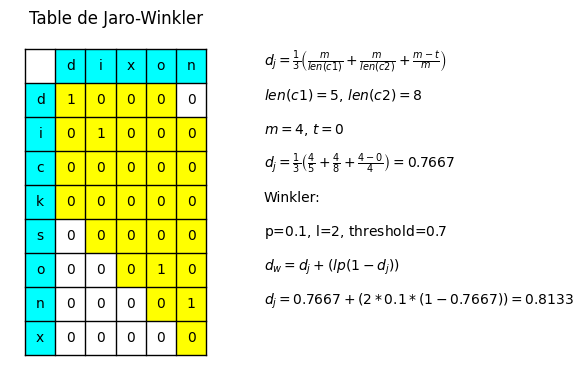

0.8133333333333332

In [13]:
DistanceDeJaroWinkler()("dixon", show_table=True)("dicksonx")

On fait une recherche des meilleures correspondances de mots comme dans l'algorithme précédent.

In [14]:
pred, time_elapsed = utils.getPredictions(
    DistanceDeJaroWinkler(), TestWord, TestWord[:2], modifier_funct=lambda x: 1 - x
)
print(
    "{0} as mis {1:f} secondes pour s'executer".format(
        (DistanceDeJaroWinkler.__name__), time_elapsed
    )
)
print("Prediction for word: ", TestWord)
print(pred)

DistanceDeJaroWinkler as mis 0.575780 secondes pour s'executer
Prediction for word:  abouhcemsnr
           ortho  affinity
865  aboucherons  0.076364
854     aboucher  0.079545
867     abouches  0.079545


### Un point de comparaison <a class="anchor" id="calcul-comparaison"></a>

Pour donner un moyen un peu plus ludique de comparer, on a fait une petite interface permettant de montrer les propositions des différents algorithmes pour un même problème.
Dans cette petite interaction on considère que les 2 premiers caractères sont corrects.

In [15]:
utils.displayComparaisonInterface(
    utils.getPredictions,
    DistanceDeLevenshtein,
    DistanceDeDamerauLevenshtein,
    DistanceDeJaro,
    DistanceDeJaroWinkler(),
)

Text(value='', _dom_classes=('custom-size',))

GridspecLayout(children=(Label(value='Levenshtein', layout=Layout(grid_area='widget001'), _dom_classes=('custo…

### Nos modifications <a class="anchor" id="calcul-mofifications"></a>

Pour faire ce code, on est parti de l'algorithme le plus performant de nos test c'est à dire l'algorithme de Damerau-Levenshtein.
On a donc décidé de l'améliorer en lui rajoutant des valeurs variables et de prendre en compte les lettres autour de la lettre saisie sur le clavier.
Cela donne donc l'algorithme suivant.

In [16]:
def DamerauLevenshteinReglable(costAdd=1, costSuppr=1, costSubst=1, costTransp=1, multProxi=1):
    def DamerauLevenshteinReglable(c1):
        width = len(c1) + 1

        def funct2(c2):
            D = []
            height = len(c2) + 1
            for i in range(0, height):
                D.append([0] * width)
                D[i][0] = i
            for j in range(1, width):
                D[0][j] = j

            for i in range(1, height):
                for j in range(1, width):
                    coutSubtitution = 1
                    if c1[j - 1] == c2[i - 1]:
                        coutSubtitution = 0
                    elif c2[i - 1] in utils.azerty_around_letter[c1[j - 1]]:
                        coutSubtitution *= multProxi
                    D[i][j] = min(
                        D[i - 1][j] + costSuppr,
                        D[i][j - 1] + costAdd,
                        D[i - 1][j - 1] + coutSubtitution * costSubst,
                    )
                    if (
                        i > 1
                        and j > 1
                        and c1[j - 1] == c2[i - 2]
                        and c1[j - 2] == c2[i - 1]
                    ):
                        D[i][j] = min(
                            D[i][j], D[i - 2][j - 2] + coutSubtitution * costTransp
                        )
            return D[-1][-1]
        return funct2
    return DamerauLevenshteinReglable

In [17]:
DamerauLevenshteinReglable(costAdd=1, costSuppr=1, costSubst=1, costTransp=1, multProxi=1)("retame")("ertame")

1

Pour tester quelques valeurs à titre d'exemples, on a décidé de les comparer avec l'interface.
Vous pouvez voir les configurations utilisées directement dans le code suivant:

In [18]:
utils.displayComparaisonInterface(
    utils.getPredictions,
    DamerauLevenshteinReglable(costAdd=1, costSuppr=1, costSubst=1, costTransp=1, multProxi=1),
    DamerauLevenshteinReglable(costAdd=2, costSuppr=2, costSubst=3, costTransp=1, multProxi=1),
    DamerauLevenshteinReglable(costAdd=2, costSuppr=2, costSubst=3, costTransp=2, multProxi=0),
    DamerauLevenshteinReglable(costAdd=1, costSuppr=1, costSubst=2, costTransp=2, multProxi=1),
)

Text(value='', _dom_classes=('custom-size',))

GridspecLayout(children=(Label(value='Damerau-Levenshtein-Reglable', layout=Layout(grid_area='widget001'), _do…

On peut remarquer que la configuration de la colonne 2 est assez prometteuse.
Pourrez vous trouver une meilleure configuration que nous ?

## Chaines de markov <a class="anchor" id="chaine-markov"></a>

Une chaîne de Markov est un processus stochastique possédant la propriété de Markov.
Soit un système pouvant passer d'états en états par l'intermédiaire de transition, il suit la propriété de Markov si la prédiction de l'état futur après transition dépend uniquement de l'état présent. La prédiction est indépendante des états précédants.
Ainsi mathématiquement, la probabilité s'écrit $\mathbb{P}(X_{n+1}=a | X_{n}=b)$ avec $a$ et $b$ deux états quelconques.

<div>
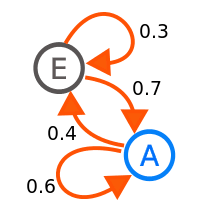
</div>

Une chaîne de Markov peut être modèlisée sous forme graphe mais aussi sous forme de matrice.
$\begin{Bmatrix} \textbf{0.3} & 0.7 \\ 0.4 & \textbf{0.6} \end{Bmatrix}$

Dans notre cas : état = mot

#### Les chaînes de Markov d'ordre n

Consiste à baser la prédiction non plus sur l'état présent mais sur les n derniers états, état présent inclu. Ainsi une chaîne de Markov "de base" est d'ordre 1. Dans notre situation la prédiction d'un mot se baserait sur les n mots précédents.
Si l'on prend l'exemple de l'ordre k=3, alors la probabilité s'écrit $\mathbb{P}(X_{n+1}=a | X_{n}=b , X_{n-1}=c , X_{n-2}=d)$.

Conséquences :
* La prédiction aura potentiellement une meilleure précision
* Cela demande beaucoup plus de données

Dans la fonction ci dessous on prend une base de données composée de phrases en français.
Puis on définit l'ordre maximale des chaînes de Markov ici 3.

On entraine ensuite le modèle. C'est un modèle simple, *markov_model* a pour clé l'ordre de la chaine.

Pour chaque ordre de chaîne de Markov on a les états initiaux en clé et une liste d'états futurs avec leur nombre d'apparitions dans la base de données d'entrainement.

In [19]:
with open("data/train_text.txt", "r") as f:
    data = f.read()
sentences = utils.data_file_to_sentences(data)

max_order = 3
markov_model = []
for i in range(max_order):
    markov_model.append(dict())

pbar = utils.create_progress_bar_training_markov(sentences)

for s in sentences:
    words = s.split(" ")
    words = utils.remove_empty_words(words)
    if len(words) == 0:
        continue
    for i in range(len(words)):
        for j in range(0, min(i, max_order)):
            utils.update_occ(
                markov_model[j],
                " ".join([words[i - k] for k in range(j + 1, 0, -1)]),
                words[i],
            )
    pbar.value += len(words)

IntProgress(value=0, bar_style='info', description='Create markov model:', max=8280, style=ProgressStyle(bar_c…

Maintenant que l'on a entrainé notre modèle, on va pouvoir commencer à s'amuser.
Par exemple, on peut essayer de prédire le mot suivant avec les chaînes de Markov.

Le problème que rencontre notre algorithme pour produire des prédictions correctes est simplement dû au manque de données d'entrainement.
Nous n'avons que 300 phrases ce qui amène à des propositions limitées.

In [20]:
text = random.choice(list(markov_model[max_order - 1].keys()))
# text = "mais ne boudons pas"

print("Bout de texte initial : ", text, "\n")
text = text.split(" ")
text_len = len(text)
for i in range(min(len(text), max_order), 0, -1):
    t = " ".join(text[-i:])
    print("Chaine de markov d'ordre {}: {}".format(i, t))
    if t in markov_model[i - 1].keys():
        s = sorted(markov_model[i - 1][t].items(), key=lambda item: item[1])
        total = sum(markov_model[i - 1][t].values())
        for j in range(0, min(len(s), 5)):
            print("{} : {:.2f}%".format(s[j][0], (s[j][1] / total) * 100))
    else:
        print("Aucune proposition disponible")
    print()

Bout de texte initial :  jeu qui permet 

Chaine de markov d'ordre 3: jeu qui permet
d : 100.00%

Chaine de markov d'ordre 2: qui permet
d : 100.00%

Chaine de markov d'ordre 1: permet
d : 50.00%
une : 50.00%



Avec les chaînes de markov, on peut aussi faire de la complétion automatique.
En revanche le sens des phrases est perdu. Comme cet algorithme ne prend pas en compte le passé, il écrit juste en fonction des mots qu'il se souvient.
Dans notre cas c'est seulement 3 mot qu'il peut utiliser pour faire sa prédiction.

In [21]:
# generate at most 100 words:
for i in range(200):

    last_idx = text_len - 1

    tmp = text[last_idx - 1] + " " + text[last_idx]
    if tmp in markov_model[1]:
        new_word = utils.gen_random_from_tbl(markov_model[1][tmp])
    else:
        # fall-back to 1st order
        tmp2 = text[last_idx]
        if tmp2 not in markov_model[0]:
            # dead-end
            break
        new_word = utils.gen_random_from_tbl(markov_model[0][tmp2])

    text.append(new_word)
    text_len = text_len + 1

print(" ".join(text))

jeu qui permet d élever et de fibres rendus très digestes grâce au processus de lactofermentation garantissant sa bonne conservation du produit environ 60 000 tonnes de choucroute et de régler ses dettes ce n est jamais question d un beau blanc nacré craquant et finement acidulé


## Pour conclure <a class="anchor" id="conclusion"></a>

Dans nos petites démonstrations on a vu les principes de base qui sont sûrement encore utilisés par nos téléphones ou par les compléteurs de code mais plus trop avec le language dit 'naturel'.
Maintenant les algorithmes performants reposent sur des réseaux de neurones ayant été entrainés sur de très grosse bases de données. (530 Go pour GPT-3)

Pour aller plus loin vous pouvez utiliser une plus grosse base de données pour les phrases et ajouter un algorithme de distance sur les résultats afin d'obtenir de bon résultats de prédiction.

Pour aller encore plus loin on pourrait implémenter un petit réseau de neurone et l'entrainer pour voir quels resultats il aurait pu nous fournir.
Cependant nous n'avons pas pu le faire par manque de temps.

### Acceder a ce notebook
<div>
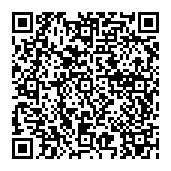
</div>